In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.cluster import KMeans


C:\Users\Iana_Bondarska\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load and clean data
df = pd.read_csv('properties_short.csv')
df = df[(df['yearbuilt'].notnull()
        & (df['regionidcity'].notnull())
        & (df['regionidcity'].notnull())
        & (df['taxvaluedollarcnt'].notnull()))]
         

C:\Users\Iana_Bondarska\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# fill na values for some features
df['calculatedbathnbr'].fillna(1, inplace = True)

df['poolcnt'].fillna(0, inplace = True)

df['fireplacecnt'].fillna(0, inplace = True)

df['garagecarcnt'].fillna(0, inplace = True)

df['garagetotalsqft'].fillna(0, inplace = True)

df['poolsizesum'].fillna(0, inplace = True)

df['roomcnt'].fillna(1, inplace = True)

df['finishedsquarefeet12'].fillna(0, inplace = True)

df['yardbuildingsqft17'].fillna(0, inplace = True)

df['calculatedfinishedsquarefeet'].fillna(0, inplace = True)
df['age'] = 2018 - df['yearbuilt']
df = df[df['assessmentyear']==2016]
df.replace({'heatingorsystemtypeid':{2.0: 'central', 7.0:'floor_wall', 20.0: 'solar'}}, inplace=True)

In [4]:
# select predictors 
predictor_properties = ['calculatedbathnbr','garagecarcnt', 'poolcnt',  'roomcnt','age','heatingorsystemtypeid', 'taxvaluedollarcnt']
predictors = df[predictor_properties]


In [5]:
# create categorical variables
predictors = pd.get_dummies(predictors, columns =['heatingorsystemtypeid'])

[5.580162842797962e+16, 2.9156650684963092e+16, 1.8030720690523624e+16, 1.1652441363176416e+16, 8235305987684915.0, 5987570567700838.0, 4388290240956098.5]


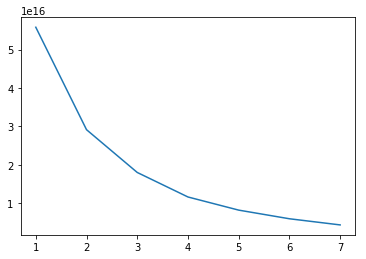

In [19]:
# KMeans clusterization
inertia_vals = []
for i in range(1, 8):
    estimator = KMeans(i)
    estimator.fit(predictors)
    inertia_vals.append(estimator.inertia_)

print(inertia_vals)    
plt.plot(range(1,8), inertia_vals)


In [22]:
#DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(predictors)
print(pd.DataFrame(db.labels_).iloc[0].value_counts())

-1    1
Name: 0, dtype: int64
